In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import math
from collections import Counter

%matplotlib inline

plt.style.use("ggplot")

In [2]:
connection = psycopg2.connect(dbname='geocenterdev',
                              user='jrkaspar', 
                              host='cslvm74.csc.calpoly.edu', 
                              password='Jrk1jrk2jrk3')

cur = connection.cursor()
 
query = """
SELECT t.* FROM public.element t      
     
     """
cur.execute(query)
queried_data = cur.fetchall()

In [22]:
elements = pd.DataFrame(queried_data, columns = ["osmId", "time", "changesetId",'type','author'])

In [25]:
elements.head()

,osmId,changesetId,type,author,day
time,,,,,
2008-10-14 14:30:51,278985288,332098,node,utilisateur anonyme,2008-10-14
2008-10-14 14:30:55,278983349,332098,node,utilisateur anonyme,2008-10-14
2008-10-14 14:31:01,278978551,332098,node,utilisateur anonyme,2008-10-14
2008-10-14 14:31:13,249212050,332098,node,utilisateur anonyme,2008-10-14
2008-10-14 14:31:15,249212056,332098,node,utilisateur anonyme,2008-10-14


In [24]:
elements['time'] = pd.to_datetime(elements['time'])
elements = elements.set_index('time')
elements['day'] = elements.index.date

In [40]:
elements = elements.set_index('osmId')

In [86]:
counts = elements.groupby(['day']).agg(len)

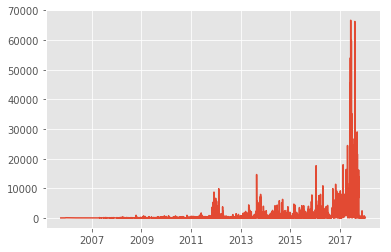

In [58]:
plt.plot(counts.index,counts.type)

Text(0.5,1,'Edits per Day')

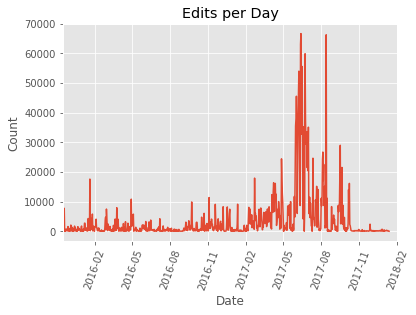

In [88]:
plt.plot(counts.index,counts.type)
plt.xlabel('Date')
plt.ylabel('Count')
plt.xlim(pd.Timestamp('2015-11-15'), pd.Timestamp('2018-02-01'))
plt.xticks(rotation = 70)
plt.title('Edits per Day')

In [92]:
elements['type'].value_counts()

node    3305139
way      360489
Name: type, dtype: int64

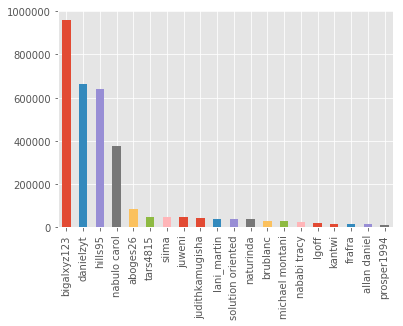

In [104]:
pd.value_counts(elements['author']).head(20).plot.bar()

(0.0, 50000)

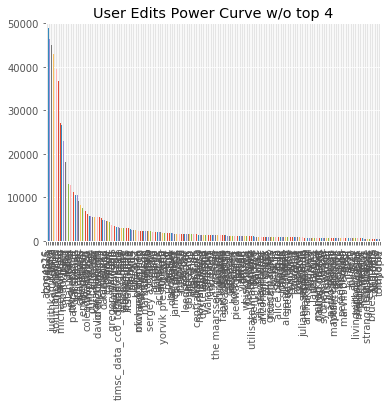

In [115]:
pd.value_counts(elements['author'])[4:200].plot.bar()
plt.title("User Edits Power Curve w/o top 4")
plt.ylim(ymax = 50000)